In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import datetime as dt
import sqlalchemy as db
import seaborn as sns

In [3]:
#Set Fonts/Plot Style
plt.style.use('ggplot')
rcParams['figure.figsize'] = [12.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_, or_

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [6]:
# Use the Inspector to explore the database and print the table names
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Use Inspector to print the column names and types
print('measurement table')
print('*'*50)
columns=inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

print('')
print('station table')
print('*'*50)
columns=inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

measurement table
**************************************************
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station table
**************************************************
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [64]:
#using pd.read_sql to select and display (also able to see columns name)
df_measurement=pd.read_sql("SELECT * FROM measurement", conn)

df_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [96]:
df_measurement['prcp']

0        0.08
1        0.00
2        0.00
3        0.00
4         NaN
         ... 
19545    0.09
19546     NaN
19547    0.56
19548    0.50
19549    0.45
Name: prcp, Length: 19550, dtype: float64

In [46]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [47]:
# Calculate the date one year from the last date in data set.
query_date=dt.date(2017,8,23)-dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [89]:
precp=session.query(Measurement.date,Measurement.prcp).filter(
                                       Measurement.date > query_date)\
                                      .group_by(Measurement.date).all()

In [114]:
# Perform a query to retrieve the date and precipitation scores
# Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
stmt=session.query(Measurement.date,func.avg(Measurement.prcp)).filter(
                                       Measurement.date > query_date)\
                                      .group_by(Measurement.date).statement
df=pd.read_sql_query(stmt, session.bind)
df

,date,avg_1
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667
...,...,...
360,2017-08-19,0.030000
361,2017-08-20,0.005000
362,2017-08-21,0.193333
363,2017-08-22,0.166667


In [107]:
#set the index to the date column
df.set_index('date', inplace=True)
df

,avg_1
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [108]:
# Sort the dataframe by date
df_stmt.sort_values('date', inplace=True)

<AxesSubplot:xlabel='date', ylabel='avg_1'>

Locator attempting to generate 1825 ticks ([-0.4, ..., 364.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1825 ticks ([-0.4, ..., 364.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1825 ticks ([-0.4, ..., 364.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1825 ticks ([-0.4, ..., 364.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1825 ticks ([-0.4, ..., 364.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1825 ticks ([-0.4, ..., 364.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1825 ticks ([-0.4, ..., 364.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1825 ticks ([-0.4, ..., 364.40000000000003]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1825 ticks ([-0.4, ..., 364.4000000000000

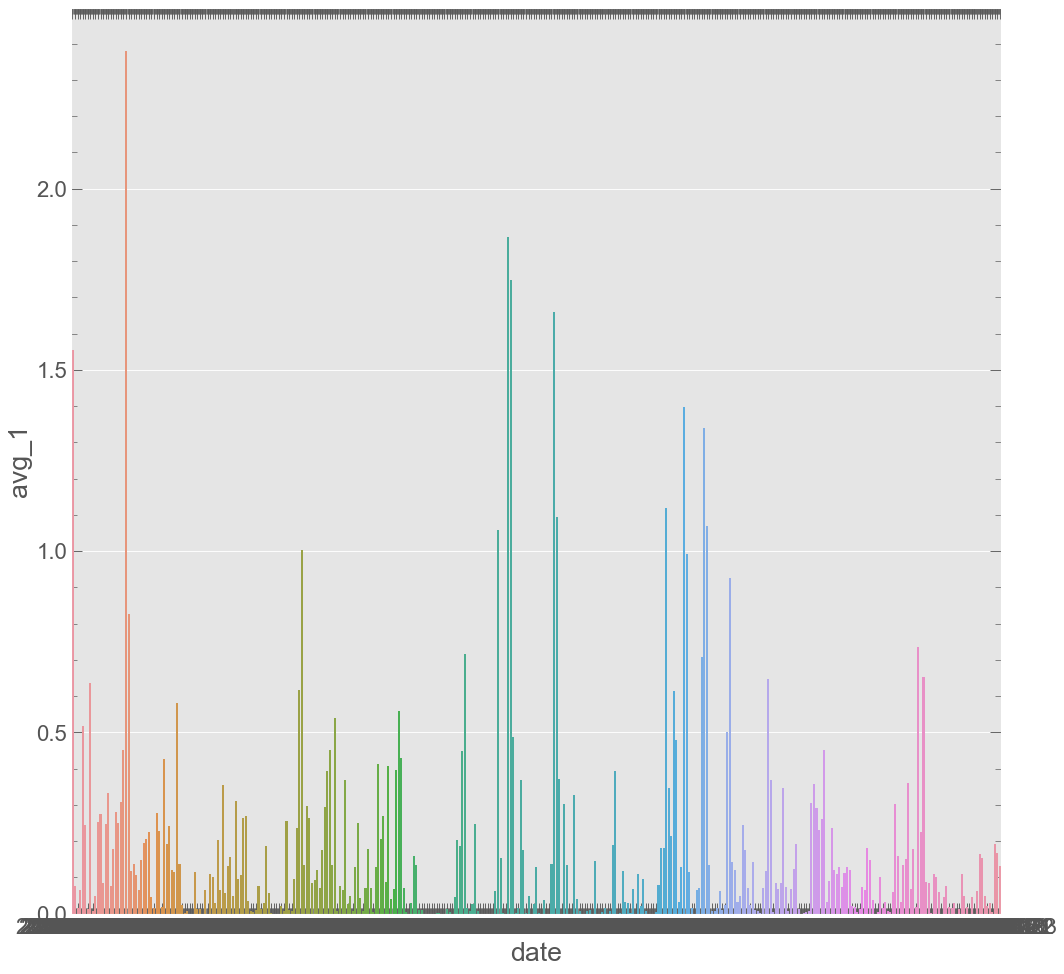

In [115]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax=plt.subplots(figsize=(15,15))
df.plot(kind='bar',rot=90, ax=ax )

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date=dt.date(2017,8,23)-dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




# Exploratory Station Analysis

In [27]:
#using pd.read_sql to select and display (also able to see columns name)
df_station=pd.read_sql("SELECT * FROM station", conn)

df_station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [84]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [30]:
#using join to combined two tables
#using read sql query 
result=session.query(Measurement, Station).filter(Measurement.station == Station.station).statement
df_comb=pd.read_sql_query(result,session.bind)
df_comb

,id,station,date,prcp,tobs,id_1,station_1,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,Station.name,func.count(Measurement.station))\
                    .filter(Measurement.station == Station.station)\
                    .group_by(Measurement.station)\
                    .order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station,func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs))\
                    .filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [117]:
results=session.query(func.min(Measurement.prcp),
                        func.avg(Measurement.prcp),
                        func.max(Measurement.prcp) )\
                        .filter(Measurement.date >= '2017-08-15')\
                        .filter(Measurement.date <= '2017-08-23').all()
results

[(0.0, 0.10935483870967744, 0.56)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
session.query(Measurement.tobs)\
                    .filter(Measurement.station == 'USC00519281')\
                    .filter(Measurement.date > query_date).all()

In [58]:
# Using pandas read sql query
# Query the last 12 months of temperature observation data for this station 
res=session.query(Measurement.tobs)\
                    .filter(Measurement.station == 'USC00519281')\
                    .filter(Measurement.date > query_date).statement
df_sta=pd.read_sql_query(res, session.bind)


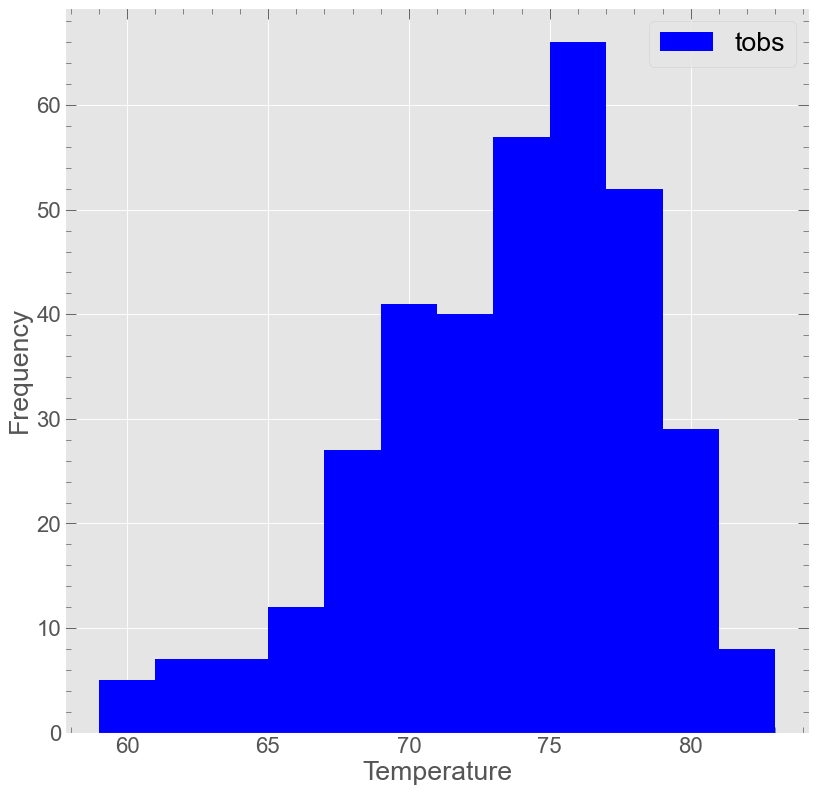

In [61]:
#plotting using matplotlib to plot the results as a histogram
fig, ax=plt.subplots(figsize=(12,12))
df_sta.plot(kind='hist', color='b',bins=12, ax=ax)
ax.set(xlabel='Temperature')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()